In [2]:
import pandas as pd
import matplotlib.pyplot as plt

criminalAreaTop10 = pd.read_csv('.\data\criminalAreaTop10.csv')
criminalAreaTop10

,범죄중분류,서울,부산,대구,인천,광주,대전,경기 수원,울산,경남 창원,경기 부천
0,교통범죄,74958,35841,39725,31163,23412,13556,14715,16600,12650,10467
1,절도,55280,20136,12759,10679,8438,9495,6487,5449,5860,5048
2,사기,53879,20533,11507,13141,7669,7250,5749,5606,6170,5727
3,폭행,36904,8852,6607,9774,5386,4054,4123,4213,2650,3129


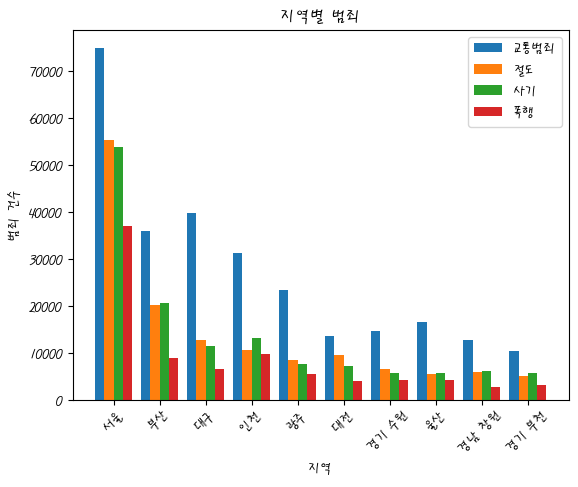

In [3]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/HMFMPYUN.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

topics = list(criminalAreaTop10.columns)[1:]

traffic = sum(criminalAreaTop10[criminalAreaTop10['범죄중분류'] == '교통범죄'].values.tolist(), [])[1:]
theft =  sum(criminalAreaTop10[criminalAreaTop10['범죄중분류'] == '절도'].values.tolist(), [])[1:]
fraud = sum(criminalAreaTop10[criminalAreaTop10['범죄중분류'] == '사기'].values.tolist(), [])[1:]
violence = sum(criminalAreaTop10[criminalAreaTop10['범죄중분류'] == '폭행'].values.tolist(), [])[1:]

t = 4 # Number of dataset
d = 10 # Number of sets of bars
w = 0.8 # Width of each bar

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

traffic_x = create_x(t, w, 1, d)
theft_x = create_x(t, w, 2, d)
fraud_x = create_x(t, w, 3, d)
violence_x = create_x(t, w, 4, d)

ax = plt.subplot()
ax.bar(traffic_x, traffic)
ax.bar(theft_x, theft)
ax.bar(fraud_x, fraud)
ax.bar(violence_x, violence)

middle_x = [(a+b+c+d)/4 for (a,b,c,d) in zip(traffic_x, theft_x, fraud_x, violence_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.title('지역별 범죄')
plt.xlabel('지역')
plt.ylabel('범죄 건수')
plt.legend(['교통범죄', '절도', '사기', '폭행'])
plt.savefig('./graphImage/criminalAreaTop10.png')
plt.show()